# 🌳 Decision Tree Classifier

## 1️⃣ Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
plt.style.use('seaborn-v0_8')
print("Libraries Loaded")

Libraries Loaded


## 2️⃣ Load Dataset
Update dataset path if required.

In [2]:
df = pd.read_csv("credit-card-default.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 3️⃣ Data Preparation

In [3]:
# Example split — update target column accordingly
X = df.drop("defaulted", axis=1)
y = df["defaulted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 4️⃣ Baseline Model Training

In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Baseline Model Trained")

Baseline Model Trained


## 5️⃣ Evaluation — Classification Metrics

In [5]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7258333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4673
           1       0.39      0.41      0.40      1327

    accuracy                           0.73      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.73      0.73      6000



## 6️⃣ Confusion Matrix Visualization

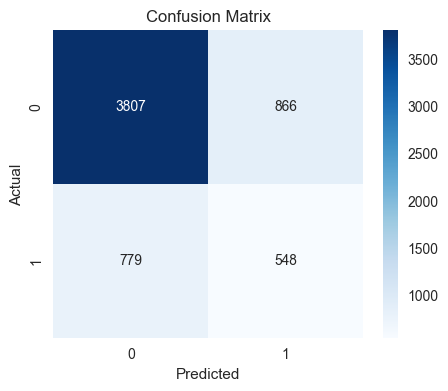

In [6]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 7️⃣ ROC‑AUC Curve (if applicable)

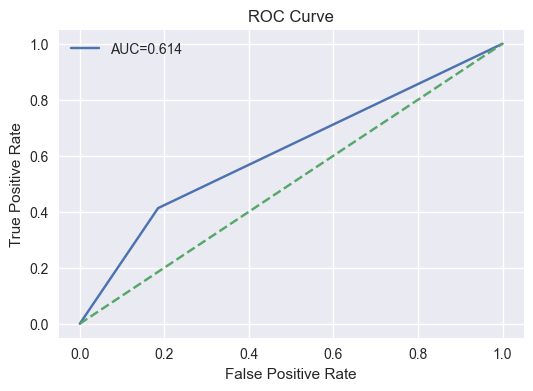

In [7]:
if len(np.unique(y_test))==2:
    y_prob = dt.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6,4))
    plt.plot(fpr,tpr,label=f'AUC={roc_auc_score(y_test,y_prob):.3f}')
    plt.plot([0,1],[0,1],'--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

## 8️⃣ Feature Importance Analysis

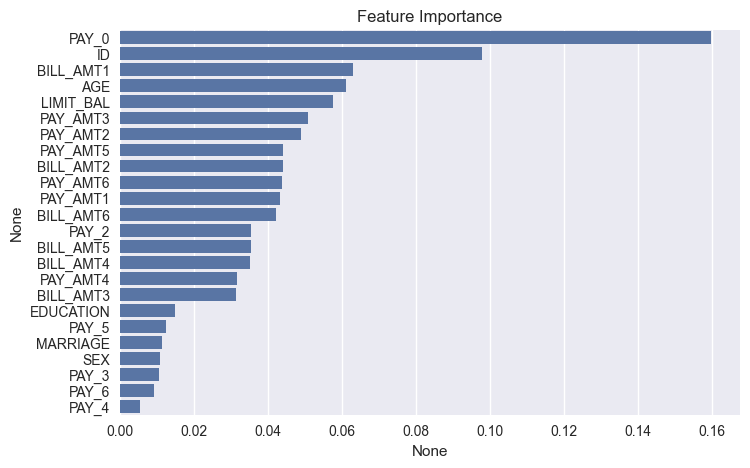

PAY_0        0.159725
ID           0.097787
BILL_AMT1    0.062899
AGE          0.061037
LIMIT_BAL    0.057496
PAY_AMT3     0.050763
PAY_AMT2     0.048836
PAY_AMT5     0.044166
BILL_AMT2    0.044015
PAY_AMT6     0.043912
PAY_AMT1     0.043304
BILL_AMT6    0.042265
PAY_2        0.035393
BILL_AMT5    0.035337
BILL_AMT4    0.035118
PAY_AMT4     0.031521
BILL_AMT3    0.031471
EDUCATION    0.014960
PAY_5        0.012344
MARRIAGE     0.011407
SEX          0.010945
PAY_3        0.010648
PAY_6        0.009179
PAY_4        0.005474
dtype: float64

In [8]:
importances = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance")
plt.show()
importances

## 9️⃣ Hyperparameter Tuning — GridSearchCV

In [9]:
params = {
    'max_depth':[3,5,7,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,5]
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nTuned Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Tuned Model Accuracy: 0.8186666666666667


## 🔎 1️⃣0️⃣ Visualizing the Decision Tree Structure

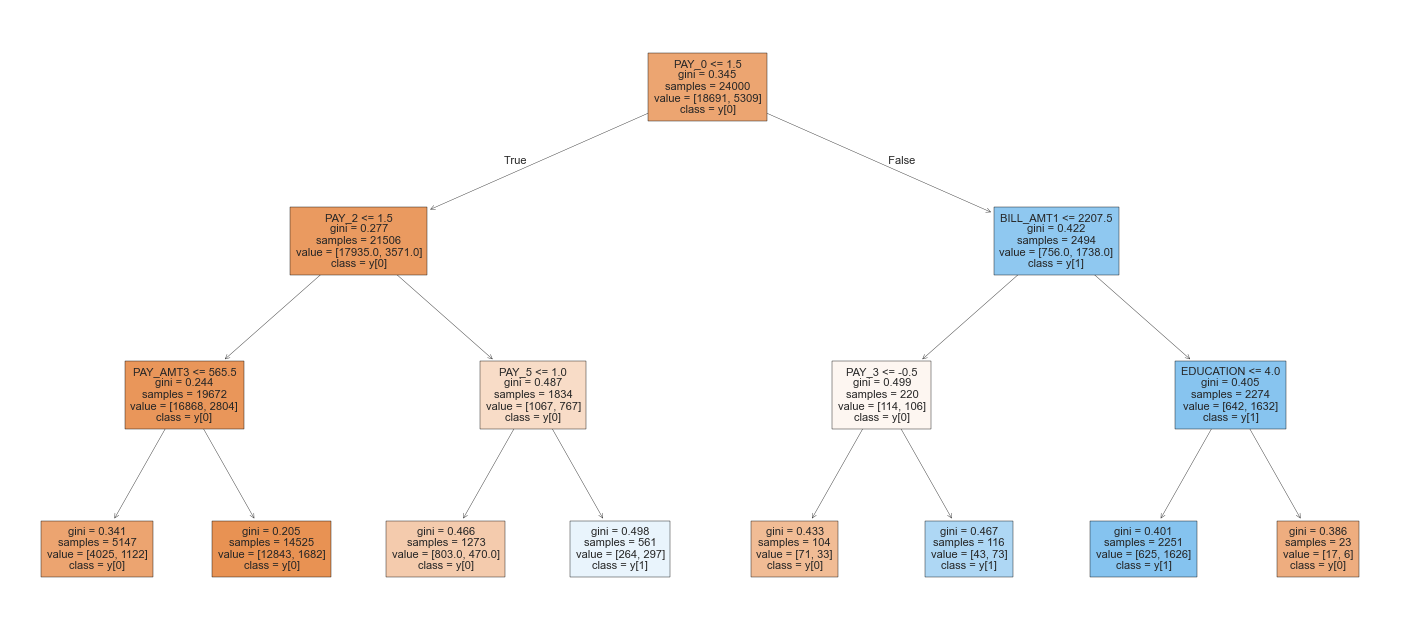

In [10]:
plt.figure(figsize=(18,8))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=True, fontsize=8)
plt.show()

## 🧠 Insights & Business Interpretation
- Decision Tree provides transparent model interpretability
- Feature Importance highlights key drivers
- Hyperparameter tuning improves generalization
- Suitable for operational ML and stakeholder communication